# Task

1. From the initial time series plot it would appear that a transformation is required to stabilize the variance. What sort of transformation would you apply?
2. Fit an ARIMA model to the original and transformed data. What are your conclusions?

__Data Set Summary__

Quality control methods and management protocols have proved to be very
effective tools for manufacturing companies. The influence of Deming, for
example, provided the Japanese automotive industry with the opportunity
to gain a substantial portion of the U.S. market. In this example, we have
seen that continuous improvement also needs to reflect the reality of a
manufacturing process. That is, the effect of seasonal variations, while they
exist, should be incorporated in QA schemes. From Figure 7.4, it would
appear that the seasonal variation in quality no longer existed over the
final year, even though the amount of product still has a strong seasonal
trend. Perhaps just having the right tools to look at a problem can make
it go away!

# Data Description

The goal of this analysis is to develop an effective time series model for predicting IQ scores. Monthly IQ score data from the past four years for a specific product is provided below. The BATCH count represents the quantity of this product manufactured by the company. This dataset is also available in Statistical Consulting book located within the c74.dat file.

# Preprocessing

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install pmdarima --quiet
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.7 MB/s eta 0:00:00


## Exploratory Analysis

In [ ]:
data = "https://raw.githubusercontent.com/whosphong/STAT-CONSULT---UAstat590/refs/heads/main/Measuring%20Quality%20Time%20-%20Sheet1.csv"

df = pd.read_csv(data)

In [ ]:
display(df.head())
df.shape

,Month,Batch,AQI
0,jan94,2339,86.63
1,feb94,2275,84.60
2,mar94,2881,87.04
3,apr94,2780,87.19
4,may94,3227,87.91


(48, 3)

The dataset includes three variables: month, batch, and AQI. The AQI is the variable of interest, which we will denote as $y_t$. The time frame will be represented by month. We are given 48 data point which indicates 4 years with each observation representing a month.

The Month variable also needs to be converted over to a date time so that we can interact and keep track of the time and not a string variable. This can be done with the code below.

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%b%y') ## Change to date time

In [ ]:
df.head()

,Month,Batch,AQI
0,1994-01-01,2339,86.63
1,1994-02-01,2275,84.60
2,1994-03-01,2881,87.04
3,1994-04-01,2780,87.19
4,1994-05-01,3227,87.91


We will plot the data to see the structure of our any trends to give insight on what to expect.

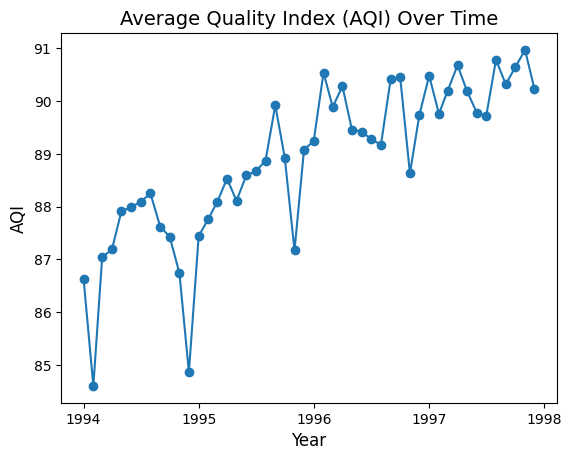

In [ ]:
# Assuming 'df' is your DataFrame containing 'Month' and 'AQI' columns

plt.plot(df['Month'], df['AQI'], marker='o')

# Format the x-axis as year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add labels and title
plt.title('Average Quality Index (AQI) Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AQI', fontsize=12)


# Display the plot
plt.show()

By first look we can see that there is an upward trend but hard to tell if there is any seasonal patterns produced by the data. To get a more indepth look we will turn to the decomposition. Decomposition refers to breaking down the time series data into its fundamental components, helping to better understand its underlying structure.

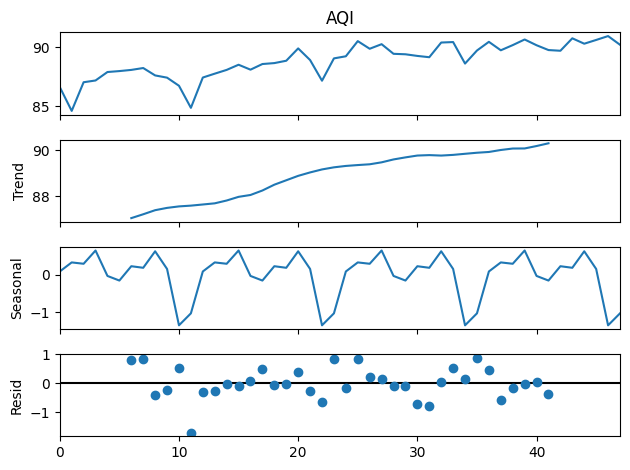

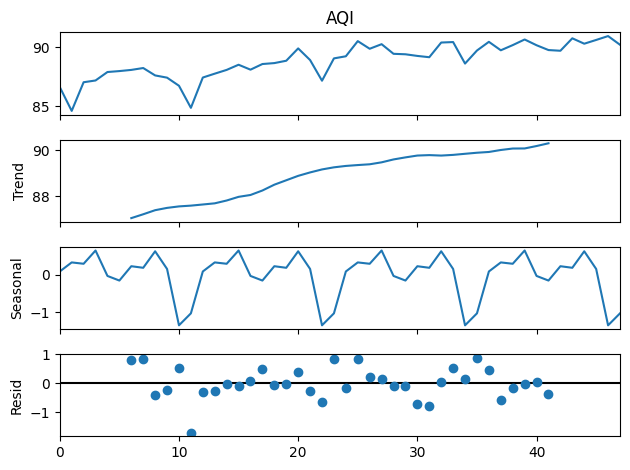

In [ ]:
result = seasonal_decompose(df['AQI'], model='additive', period=12)
result.plot()

The data exhibits an increasing trend along with a seasonal pattern that repeats approximately every 12 months. The residuals are close to zero, indicating a good fit. To apply an ARIMA model, the data must satisfy the stationary requirement, meaning its mean and variance should remain constant over time. We will compare a stationary model with the "original" model as specified in this case study, where the original model is assumed to remain unchanged or unmodified. The presence of a trend suggests that differencing will be necessary to make the data stationary.

Additionally, we will experiment with various transformations, including logarithmic, Box-Cox, and square root transformations, to make constant variance which differencing does not address.

In [ ]:
df['AQI_diff'] = df['AQI'].diff()

# Square root transformation
df['AQI_sqrt'] = np.sqrt(df['AQI'])
df['AQI_sqrt_diff'] = df['AQI_sqrt'].diff()

# Logarithmic transformation
df['AQI_log'] = np.log(df['AQI'])
df['AQI_log_diff'] = df['AQI_log'].diff()

# Perform Box-Cox transformation
df['AQI_boxcox'], lam = boxcox(df['AQI'])
df['AQI_boxcox_diff'] = df['AQI_boxcox'].diff()


To observe the effects of differencing and transformations, we will plot and compare the original AQI, the differenced AQI, and the AQI after applying transformations and differencing. This will allow us to assess the impact of each approach.

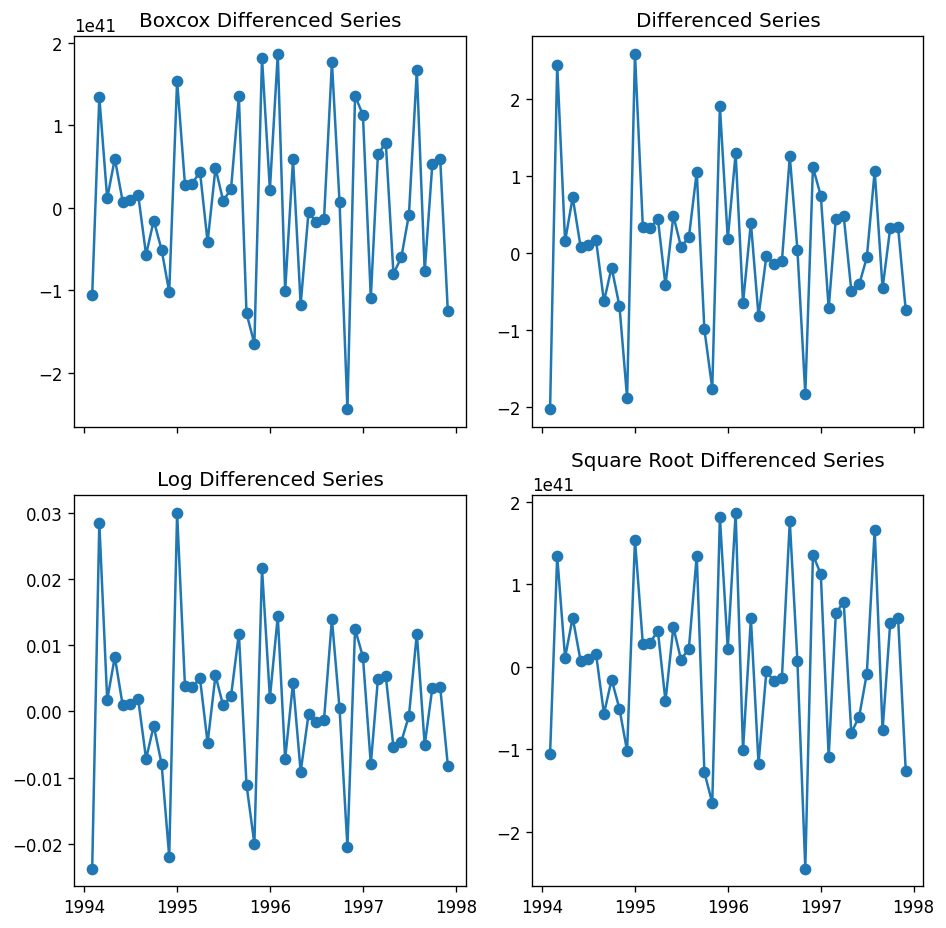

In [ ]:
plt.rcParams.update({'figure.figsize':(8, 8), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)

# Original Series
axes[0, 0].plot(df['Month'], df['AQI_boxcox_diff'], marker='o')
axes[0, 0].set_title('Boxcox Differenced Series')

# Differenced Series
axes[0, 1].plot(df['Month'], df['AQI_diff'], marker='o')
axes[0, 1].set_title('Differenced Series')

# Log Differenced Series
axes[1, 0].plot(df['Month'], df['AQI_log_diff'], marker='o')
axes[1, 0].set_title('Log Differenced Series')

# Square Root Differenced Series
axes[1, 1].plot(df['Month'], df['AQI_boxcox_diff'], marker='o')
axes[1, 1].set_title('Square Root Differenced Series')

# Format the x-axis to show only the year
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()

Initially, we observe the trend, as identified in the decomposition, but after differencing the data, the moving average no longer shows an increasing or decreasing pattern—it remains relatively constant. Transformations help maintain a consistent spread in the data. For the original and differenced series, the spread appears to form a funnel shape, a characteristic of non-constant variance. This is also true for the log-transformed series. However, the square root and Box-Cox transformations result in a more consistent variance, showing better stability across the data.

The goal here is to make the data stationary, which we can test using the Augmented Dickey-Fuller (ADF) test. The null hypothesis for this test is that the data is not stationary, while the alternative hypothesis is that the data is stationary. A p-value less than 0.05 provides strong evidence to reject the null hypothesis, indicating that the data is indeed stationary.

In [ ]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

print(' Original ADI')
print('------------------')
adf_test(df["AQI"][1:]) ## Non-stationary
print('------------------')
print(' Log Difference ADI')
print('------------------')
adf_test(df["AQI_log_diff"][1:])
print('------------------')
print(' Original Difference ADI')
print('------------------')
adf_test(df["AQI_diff"][1:]) ## Both are stationary but non-log difference slightly better
print('------------------')
print(' Boxcox Difference ADI')
print('------------------')
adf_test(df["AQI_boxcox_diff"][1:]) ## Boxcox difference is also stationary
print('------------------')
print(' Sqrt Differenced ADI')
print('------------------')
adf_test(df["AQI_sqrt_diff"][1:]) ## Sqrt difference is also stationary
print('------------------')

 Original ADI
------------------
ADF Statistic:  -1.8071834692874549
P-Value:  0.3769011778347431
Critical Values:
	1%: -3.59
	5%: -2.93
	10%: -2.60
------------------
 Log Difference ADI
------------------
ADF Statistic:  -4.52850918420652
P-Value:  0.00017458598579492832
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
------------------
 Original Difference ADI
------------------
ADF Statistic:  -4.547497242284982
P-Value:  0.00016122637260600683
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
------------------
 Boxcox Difference ADI
------------------
ADF Statistic:  -7.224591308791732
P-Value:  2.068868377690321e-10
Critical Values:
	1%: -3.58
	5%: -2.93
	10%: -2.60
------------------
 Sqrt Differenced ADI
------------------
ADF Statistic:  -4.5379180734463915
P-Value:  0.0001678394868607654
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
------------------


The original, untouched data fails the ADF test and is not stationary. We then examine the effects of differencing and transformations. The smallest p-value is observed with the Box-Cox transformation combined with first-order differencing, suggesting it provides the most effective solution for achieving stationarity. While differencing alone also results in stationary data, the Box-Cox transformation outperforms other transformations, such as the logarithmic and square root transformations, in terms of maintaining stationarity. Thus, Box-Cox combined with differencing provides the best approach to ensure the data is stationary.

Next, to fit the ARIMA model, we need to determine the appropriate values for $p$ and $q$, which represent the lags for the autoregressive (AR) and moving average (MA) components, respectively.
- $p$ is determined by examining the PACF (Partial Autocorrelation Function) plot. The PACF shows the correlation between the series and its lag, after excluding the influence of intermediate lags. The optimal value for $p$ is typically the point where the PACF cuts off (i.e., where the correlation becomes insignificant).
- $q$ is determined by analyzing the ACF (Autocorrelation Function) plot, which measures the correlation between the series and its lag without excluding intermediate lags. The value of $q$ is typically chosen based on where the ACF cuts off or where the significant lags end.

It's important to note that the task specifically asks for fitting both an original and a transformed ARIMA model. This means both models can use differencing to ensure stationarity, but the key difference is that one model is left untransformed, while the other incorporates a transformation to address constant variance. The transformed model aims to stabilize the variance, ensuring more reliable modeling and forecasting.

In [ ]:
def plot_acf_pacf(dataframe, column):
    dataframe.dropna(inplace=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
    plot_acf(dataframe[column], ax=ax1)
    plot_pacf(dataframe[column], method='ywm', ax=ax2)
    ax1.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='both', labelsize=12)
    plt.show()


Looking at the untransformed, first-order differenced correlation plots, we can observe that the blue shaded region represents the non-significant bands. In the autocorrelation plot, values that fall outside this band are at lag 1, while in the partial autocorrelation plot, the significant lags are at 9 and 1 . Based on these observations, the possible values for $p$ and $q$ are either $p=1$ and $q=1$, or $p=9$ and $q=1$ , depending on which lag is chosen from the PACF plot.

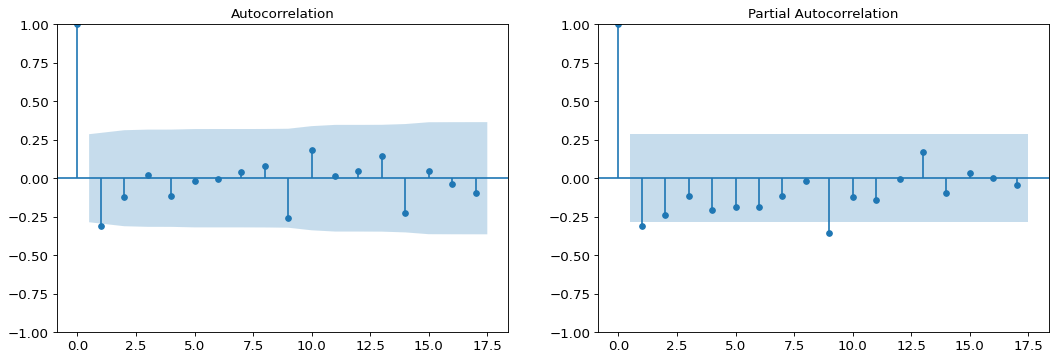

In [ ]:
plot_acf_pacf(df, 'AQI_diff')

Similarly, we will apply the same analysis to the Box-Cox transformed data, as it provided the smallest ADF p-value among all the transformations. In this case, we observe that the values for $p$ and $q$ should be either $p=1$ and $q=1$, or $p=2$ and $q=1$, based on the significant lags observed in the ACF and PACF plots.

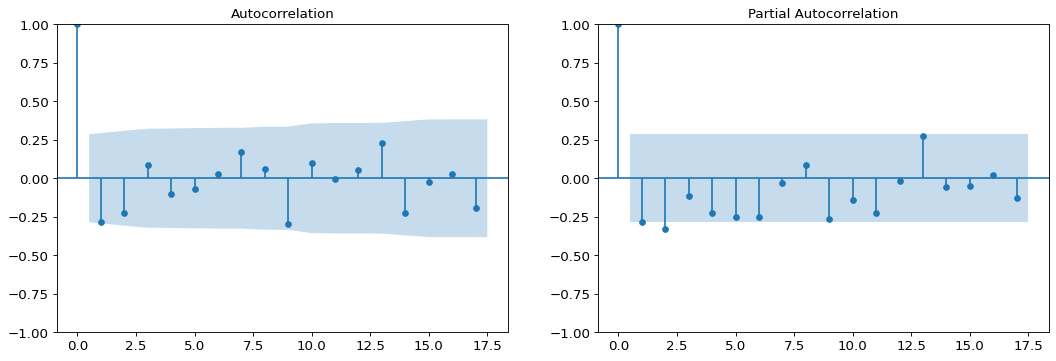

In [ ]:
plot_acf_pacf(df, 'AQI_boxcox_diff')

Now that we have determined the necessary differencing and the values for $p$ and $q$, we can proceed to fit our ARIMA model and examine the coefficients. Additionally, we will evaluate the model using the AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values. These criteria help us identify the most parsimonious model, with lower AIC and BIC values indicating a better balance between model fit and complexity.

In [ ]:
def model_fit_test(dataframe, column, order=(1, 1, 1), dif=0):
    model = ARIMA(dataframe[column], order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    residuals = model_fit.resid[dif:]

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    residuals.plot(title='Residuals', ax=ax[0])
    residuals.plot(title='Density', kind='kde', ax=ax[1])

    plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -60.888
Date:                Sat, 01 Mar 2025   AIC                            127.776
Time:                        18:54:00   BIC                            133.327
Sample:                    01-01-1994   HQIC                           129.865
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3101      0.215      1.444      0.149      -0.111       0.731
ma.L1         -0.7492      0.188     -3.984      0.000      -1.118      -0.381
sigma2         0.7747      0.169      4.589      0.0

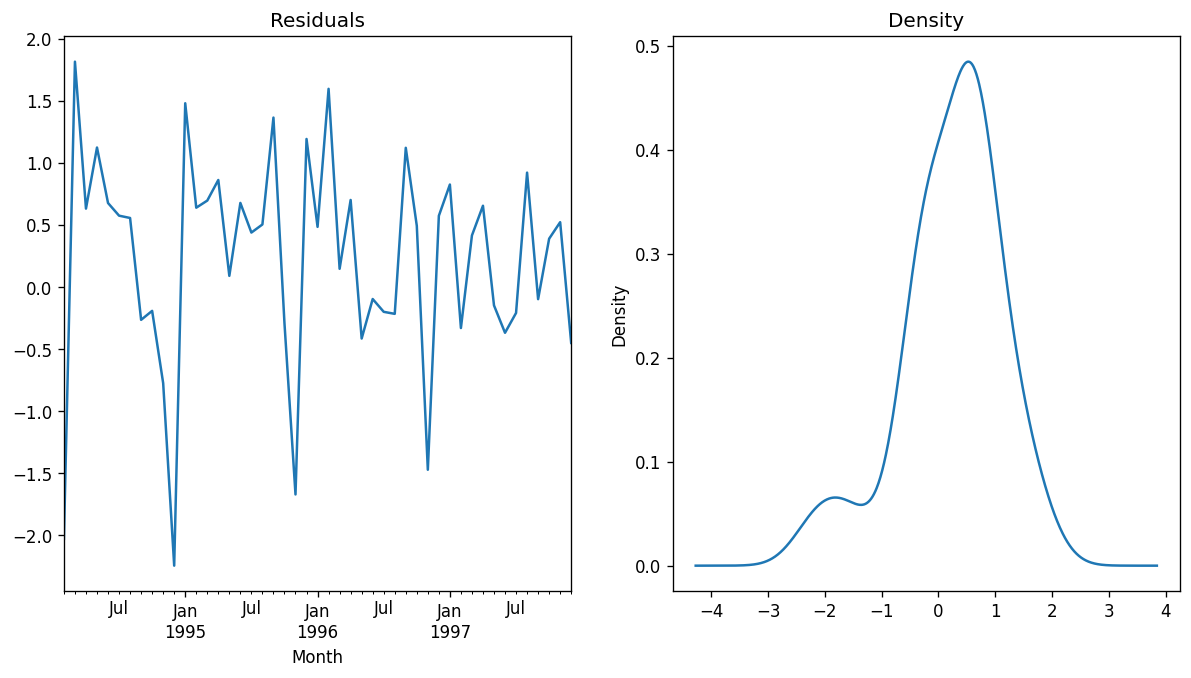

In [ ]:
model_fit_test(df, 'AQI', order=(1,1,1),dif=1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   47
Model:                 ARIMA(9, 1, 1)   Log Likelihood                 -56.431
Date:                Sat, 01 Mar 2025   AIC                            134.862
Time:                        18:25:19   BIC                            154.977
Sample:                             0   HQIC                           142.397
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2979      0.307     -0.970      0.332      -0.900       0.304
ar.L2         -0.3168      0.196     -1.612      0.107      -0.702       0.068
ar.L3         -0.1827      0.234     -0.779      0.4

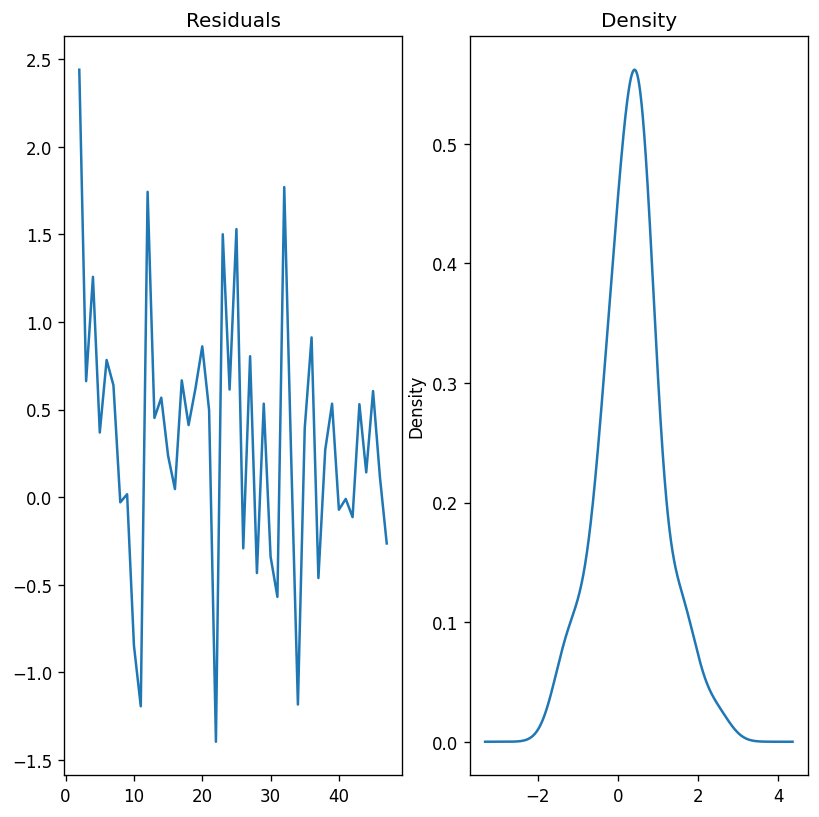

In [ ]:
model_fit_test(df, 'AQI', order=(9,1,1),dif=1)

When fitting the model to the untransformed AQI data, we observe that the coefficients are not significant when $p=9$ and $q=1$, indicating that this model is not ideal. In contrast, when $p=1$ and $q=1$, we see that both the AIC and BIC values are lower, and the p-values suggest that all parameters are significant. Therefore, we will choose this model as the best fit for the untransformed AQI data. Note when looking at the residual we can also see some type of funneling which could indicate a non constant variance. However the kde of residual do indicate a normal distribution which is good.

Similarly, when applying the same process to the Box-Cox transformed data and evaluating the two potential models, we find that... (complete with further observations for the Box-Cox models, such as which model has the lowest AIC/BIC and the significance of coefficients).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             AQI_boxcox   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4404.220
Date:                Sat, 01 Mar 2025   AIC                           8814.440
Time:                        18:25:20   BIC                           8819.926
Sample:                             0   HQIC                          8816.495
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3698      0.314      1.176      0.239      -0.246       0.986
ma.L1         -0.7175      0.250     -2.866      0.004      -1.208      -0.227
sigma2      8.489e+81   3.47e-84  2.44e+165      0.0

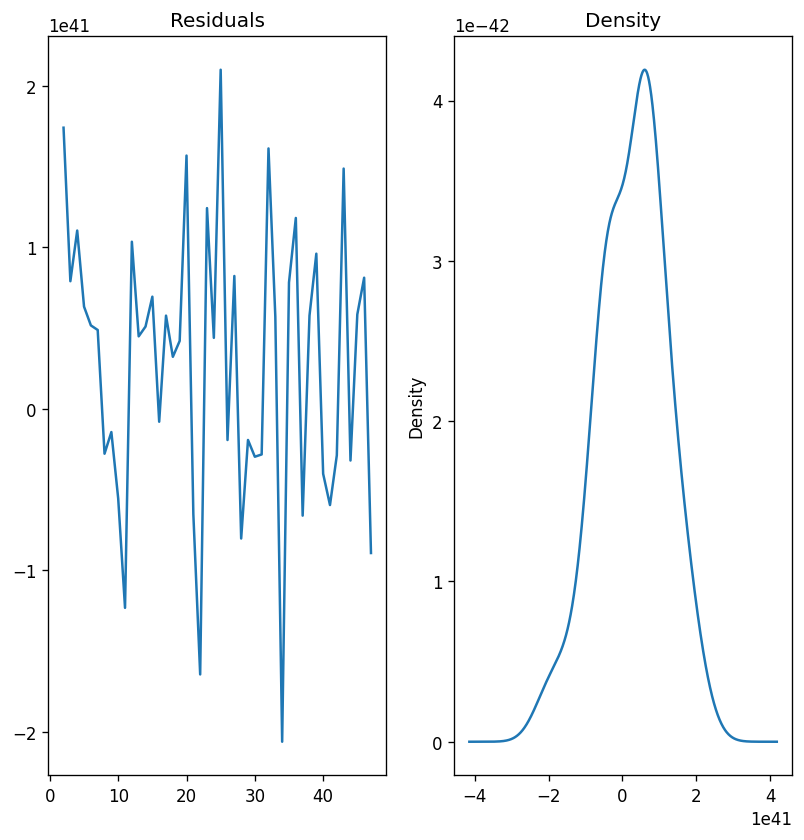

In [ ]:
model_fit_test(df, 'AQI_boxcox', order = (1,1,1), dif=1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             AQI_boxcox   No. Observations:                   47
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4403.926
Date:                Sat, 01 Mar 2025   AIC                           8815.851
Time:                        18:25:22   BIC                           8823.166
Sample:                             0   HQIC                          8818.591
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2886      0.344      0.840      0.401      -0.385       0.962
ar.L2         -0.1476      0.188     -0.785      0.432      -0.516       0.221
ma.L1         -0.6106      0.364     -1.679      0.0

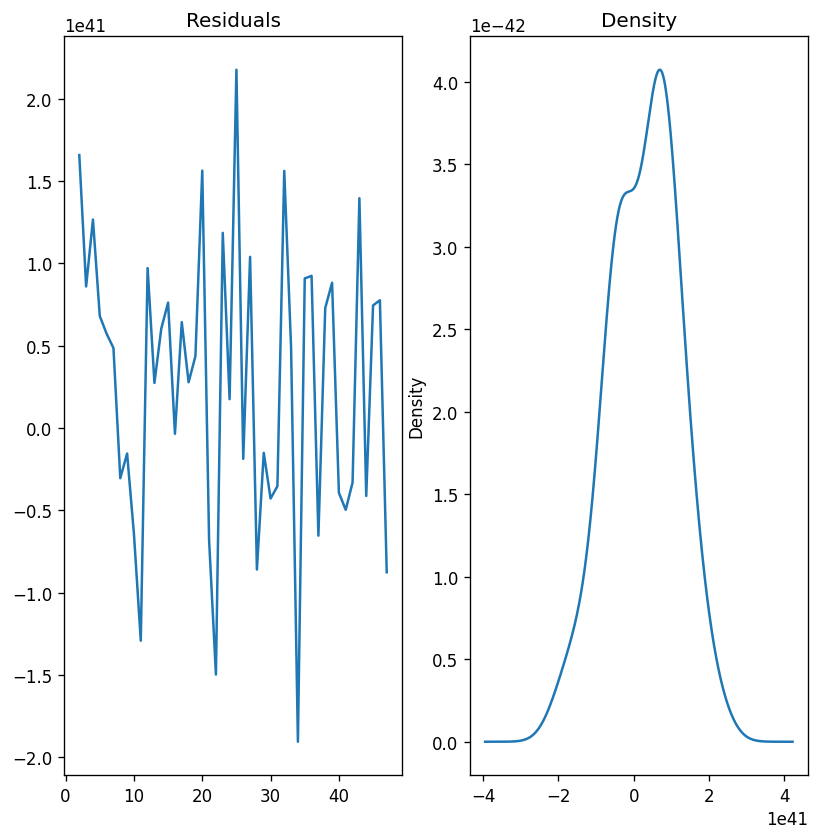

In [ ]:
model_fit_test(df, 'AQI_boxcox', order = (2,1,1), dif=1)

Note that earlier we indicated that the ADF p-value showed strong significance against the null hypothesis, suggesting that the transformed model is stationary. However, when we examine the AIC and BIC values, we see that the transformed model has significantly higher values compared to the untransformed model. This indicates that, while the transformation helped achieve stationarity, it also increased the model's complexity without necessarily improving its fit in a way that justifies the added complexity.

In this case, despite the transformed model passing the ADF test and appearing more stationary, the higher AIC and BIC values suggest that the untransformed model, which is simpler and has better criteria for model fit, might be the better choice. This highlights the trade-off between model fit, stationarity, and complexity when selecting the optimal ARIMA model.

Instead we will look at the log transformation as this is the second best option.

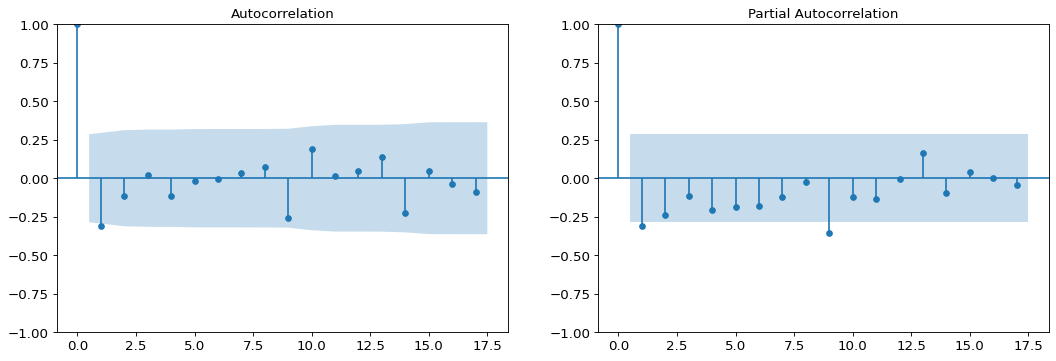

In [ ]:
plot_acf_pacf(df, 'AQI_log_diff')

Similarly to the untransformed model, we have potential pairs of $p$ and $q$ for the transformed model, which could be either $p=1$ and $q=1$, or $p=9$ and $q=1$. These values are based on the analysis of the ACF and PACF plots. The choice between these pairs depends on the significance of the coefficients and the overall fit of the model, with the goal of balancing model complexity and accuracy in forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

                               SARIMAX Results                                
Dep. Variable:                AQI_log   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 146.138
Date:                Sat, 01 Mar 2025   AIC                           -286.275
Time:                        18:25:23   BIC                           -280.789
Sample:                             0   HQIC                          -284.220
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4241      0.247      1.719      0.086      -0.059       0.908
ma.L1         -0.7501      0.240     -3.119      0.002      -1.221      -0.279
sigma2         0.0001    2.1e-05      4.817      0.0

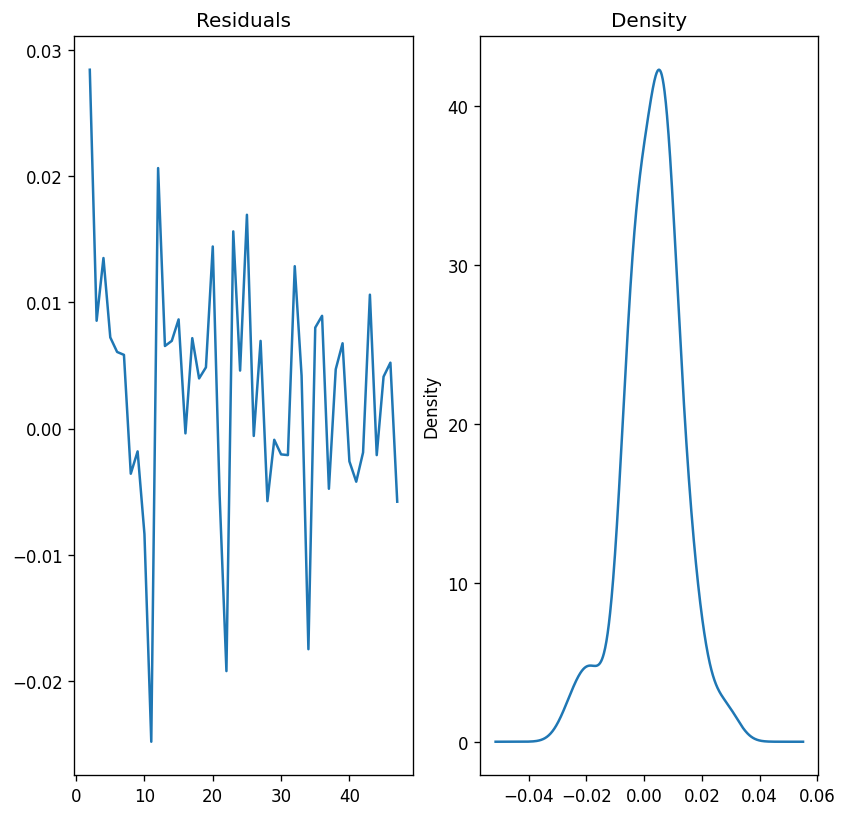

In [ ]:
model_fit_test(df, 'AQI_log', order = (1,1,1), dif=1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

                               SARIMAX Results                                
Dep. Variable:                AQI_log   No. Observations:                   47
Model:                 ARIMA(9, 1, 1)   Log Likelihood                 149.285
Date:                Sat, 01 Mar 2025   AIC                           -276.570
Time:                        18:25:27   BIC                           -256.455
Sample:                             0   HQIC                          -269.035
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1331      0.304     -0.438      0.661      -0.728       0.462
ar.L2         -0.2523      0.193     -1.309      0.191      -0.630       0.126
ar.L3         -0.1266      0.220     -0.575      0.5

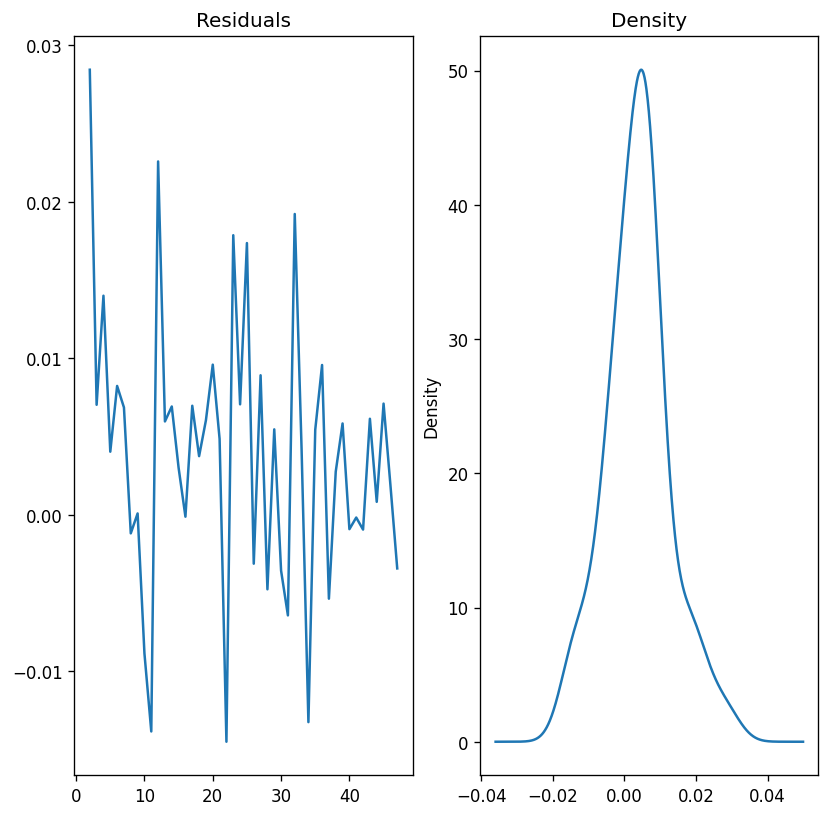

In [ ]:
model_fit_test(df, 'AQI_log', order = (9,1,1), dif=1)

After fitting both potential models, we find that the most parsimonious model, with $p=1$ and $q=1$, is the best option for our case. Now, we have two models to compare: the untransformed AQI model with $p=1$ and $q=1$, and the log-transformed AQI model with $p=1$ and $q=1$. These two models will be evaluated based on their AIC, BIC, and overall fit to determine which one provides the most reliable and efficient forecasting.

We will now proceed to forecast using both models and evaluate their predictions. To do this, we will first define a function to handle the forecasting process. Additionally, we will split the data into a 70-30 split, where 70% of the data will be used for training the model and the remaining 30% will be reserved for testing the model's predictive performance.

The training data will be used to fit the ARIMA models, and the testing data will be used to assess how well the models predict future values. There are many metrics that can evaluate performance such as RMSE (Root Mean Square Error) or MAE (Mean Absolute Error) but we will be using the MAPE (Mean Absolute Percentage Error) which if we compute 1 - MAPE will show us how accurate the model is.

MAPE is computed as

$$
MAPE=\frac{1}{n} \sum_{i=1}^n\left|\frac{A_i-P_i}{A_i}\right| \times 100
$$

In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
def forecast_accuracy(forecast, actual):

    forecast = np.ravel(forecast)
    actual = np.ravel(actual)


    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))

    me = np.mean(forecast - actual)

    mae = np.mean(np.abs(forecast - actual))

    mpe = np.mean((forecast - actual)/actual)

    rmse = np.sqrt(np.mean((forecast - actual)**2))
    corr = np.corrcoef(forecast, actual)[0,1]

    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins/maxs)
    acf1 = acf(forecast - actual)[1]

    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'acf1': acf1,
        'corr': corr,
        'minmax': minmax
    }

def arima_forecast_and_evaluate(df, column='AQI', order=(1, 0, 0), train_ratio=0.85):

    train_size = int(len(df) * train_ratio)
    train = df.iloc[:train_size]
    test = df.iloc[train_size:]

    model = ARIMA(train[column], order=order)
    fitted = model.fit()
    print(fitted.summary())

    forecast_results = fitted.get_forecast(steps=len(test), alpha=0.05)


    fc = forecast_results.predicted_mean
    se = forecast_results.se_mean
    conf = forecast_results.conf_int()


    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)


    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train['Month'], train[column], label='Training Data')
    plt.plot(test['Month'], test[column], label='Actual Data')
    plt.plot(test['Month'], fc_series, label='Forecasted Data')
    plt.fill_between(test['Month'], lower_series, upper_series, color='k', alpha=0.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)


    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.show()

    accuracy_metrics = forecast_accuracy(fc, test[column].values)
    return accuracy_metrics


First fitting the untransformed model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -43.346
Date:                Sat, 01 Mar 2025   AIC                             92.691
Time:                        18:25:28   BIC                             96.993
Sample:                             0   HQIC                            94.093
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4804      0.324      1.484      0.138      -0.154       1.115
ma.L1         -0.7600      0.325     -2.336      0.019      -1.398      -0.122
sigma2         0.9528      0.261      3.652      0.0

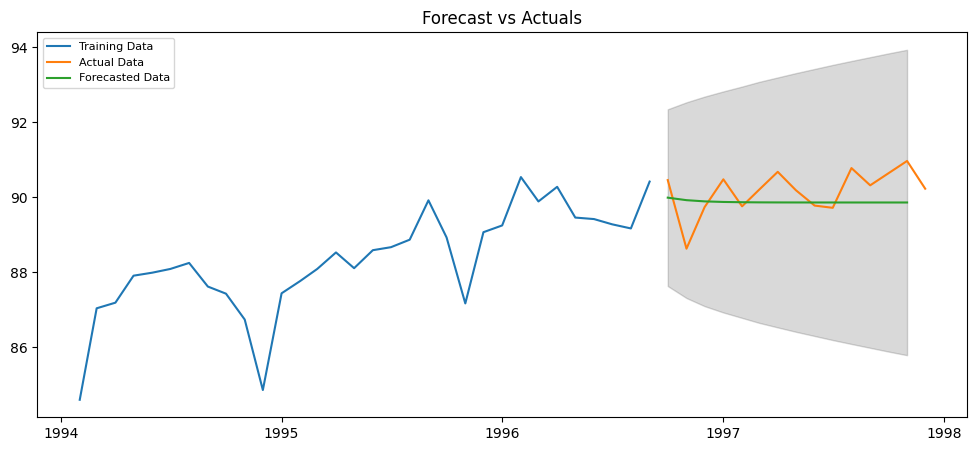

{'mape': 0.005842429079509394, 'me': -0.2753324675926668, 'mae': 0.5269877437019393, 'mpe': -0.0030128789074821893, 'rmse': 0.6469908676429927, 'acf1': 0.19427959062280004, 'corr': -0.23819688925827587, 'minmax': 0.0058263284098227786}


In [ ]:
accuracy = arima_forecast_and_evaluate(df, column='AQI', order=(1, 1, 1), train_ratio=0.7)
print(accuracy)

We can see that the model captures the overall trend in the data, with an impressive accuracy of $1-$ $0.005842429079509394=0.9942$ (or $99 \%$ accuracy). This suggests that the model is able to follow the general pattern and closely approximate the actual values. However, upon closer inspection, we observe that the model appears to behave more like a rolling average rather than capturing more complex patterns or fluctuations.

This could indicate that while the model is good at tracking the broader trend, it may not be capturing finer variations in the data, such as short-term spikes or dips. The model might smooth out the fluctuations, essentially acting like a moving average, which could be a result of the ARIMA model's nature of incorporating past values to predict future ones. This kind of behavior is common when the data exhibits a strong trend but lacks significant seasonality or irregular patterns that would require more intricate modeling.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             AQI_boxcox   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2967.379
Date:                Sat, 01 Mar 2025   AIC                           5940.758
Time:                        18:25:28   BIC                           5945.060
Sample:                             0   HQIC                          5942.160
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5713      0.532      1.074      0.283      -0.472       1.614
ma.L1         -0.7328      0.498     -1.471      0.141      -1.709       0.243
sigma2      8.252e+81        nan        nan        n

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


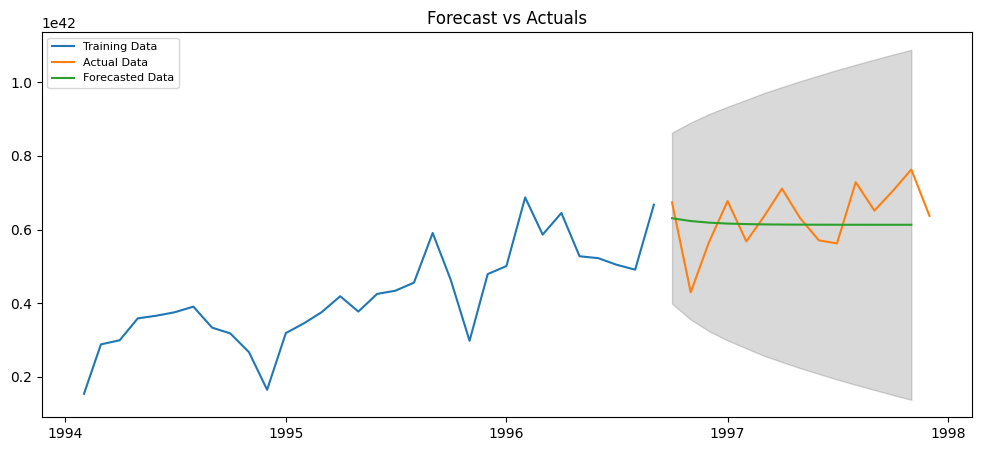

{'mape': 0.11515008231150956, 'me': -1.593647792256279e+40, 'mae': 6.944349256497884e+40, 'mpe': -0.0055258240922526885, 'rmse': 8.6146475599729795e+40, 'acf1': 0.18239330690661607, 'corr': -0.28533827820740215, 'minmax': 0.10323548544173566}


In [ ]:
accuracy = arima_forecast_and_evaluate(df, column='AQI_boxcox', order=(1, 1, 1), train_ratio=0.7)
print(accuracy)

Similarly, for the log-transformed model, we get a MAPE of 0.0011858809879742086, which indicates a very high level of accuracy. Specifically, the accuracy would be:

$$1 - 0.0011858809879742086 = 0.9988 \text{ (or 99.88%)}$$

This suggests that the log-transformed model does an excellent job of capturing the overall trend in the data. However, like the untransformed model, it seems to smooth out fluctuations, reflecting more of a rolling average effect rather than capturing finer details or sharp variations in the data.

Nonetheless, we do see that the log-transformation has a better accuracy at forecasting the AQI data.

We initially selected the $\boldsymbol{p}$ and $\boldsymbol{q}$ values manually based on the ACF and PACF plots. Now, we will use a package to automatically search for the best ARIMA model for both data cases. This will allow us to efficiently identify the optimal parameters without manually testing different combinations, potentially improving the model's accuracy and performance.

In [ ]:
model = pm.auto_arima(df.AQI, start_p=1, start_q=1,
                      test='adf',
                      max_p=12, max_q=12,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=127.783, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=127.192, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=126.574, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.853 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -62.287
Date:                Sat, 01 Mar 2025   AIC                            126.574
Time:                        18:25:33   BIC                            128.402
Sample:                             0   HQIC                           127.259
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


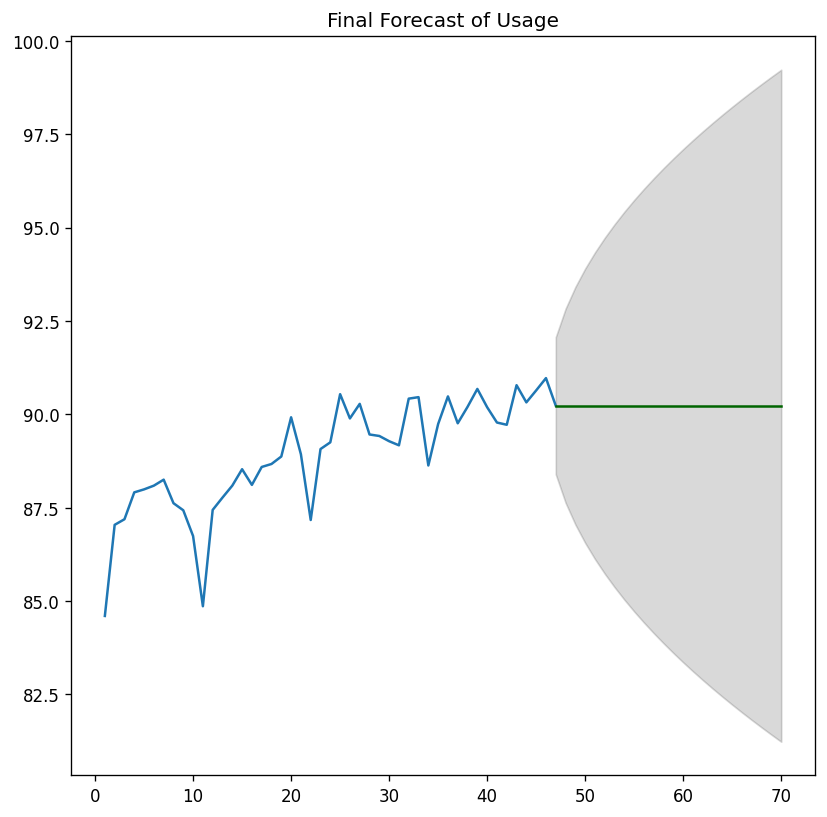

In [ ]:

n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.AQI), len(df.AQI)+n_periods)


fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


plt.plot(df.AQI)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

The model predicts $p=0, q=0$ with first-order differencing. This suggests that the data may not exhibit strong dependencies or patterns that can be captured by autoregressive (AR) or moving average (MA) terms. An ARIMA( $0,1,0$ ) model is essentially a random walk model, where the future value is simply the previous value plus some noise, with differencing applied to make the data stationary. This indicates that the series may not have complex structures, and the most effective way to model it is by removing the trend through differencing.

Similarly for the log transformation we can do

In [ ]:
model = pm.auto_arima(df.AQI_boxcox, start_p=1, start_q=1,
                      test='adf',
                      max_p=12, max_q=12,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8816.440, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8817.176, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8817.924, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8816.188, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8815.722, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.522 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4406.861
Date:                Sat, 01 Mar 2025   AIC                           8815.722
Time:                        18:25:34   BIC                           8817.551
Sample:                             0   HQIC                          8816.407
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


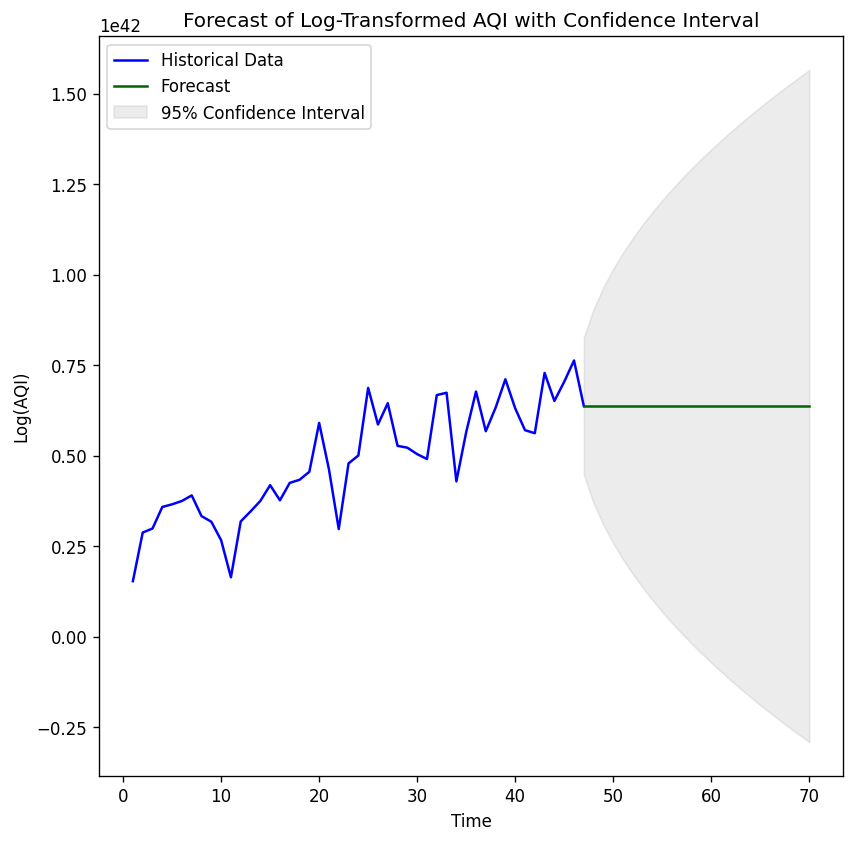

In [ ]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = np.arange(len(df.AQI_boxcox), len(df.AQI_boxcox) + n_periods)

fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(df.AQI_boxcox, label='Historical Data', color='blue')
plt.plot(fc_series, label='Forecast', color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='gray', alpha=0.15, label='95% Confidence Interval')

plt.title("Forecast of Log-Transformed AQI with Confidence Interval")
plt.xlabel("Time")
plt.ylabel("Log(AQI)")
plt.legend()

plt.show()


We see that the model automatically selects ARIMA( $0,1,2$ ), with $p=0$ and $q=2$, which is quite different from the choices we manually made earlier. This result suggests that the model identified a different optimal combination of parameters based on its automated selection process, which takes into account the overall fit, the AIC/BIC criteria, and the residuals. But note that the coefficients are not significant when looking at the p-value but the AIC and BIC does show a lower value.

# SARIMA

The reason our ARIMA model has not been effectively capturing the fluctuations, but only the overall trend, is that ARIMA does not account for seasonal patterns inherent in the data. To address this, we will fit a SARIMA (Seasonal ARIMA) model, which specifically incorporates seasonal changes and allows the model to better capture both trends and seasonal fluctuations. Instead of manually selecting the seasonal and non-seasonal parameters $p$ and $q$, we will use an automated package that can search for the best SARIMA model, optimizing the parameters based on the data, and avoiding subjective decisions.

Instead of performing first-order differencing, we will apply 12th-order differencing to account for the seasonal trend we observed in the decomposition plot, where the seasonal pattern repeats every 12 months. This will help remove the seasonal component from the data and make it stationary, allowing the model to capture the underlying trends more effectively. By differencing at a seasonal lag of 12, we can ensure that the model accounts for the annual seasonality, improving its ability to model and predict seasonal fluctuations.

In [ ]:
df['AQI_diff12'] = df['AQI'].diff(12)

df['AQI_sqrt_diff12'] = df['AQI_sqrt'].diff(12)

df['AQI_log_diff12'] = df['AQI_log'].diff(12)

df['AQI_boxcox_diff12'] = df['AQI_boxcox'].diff(12)

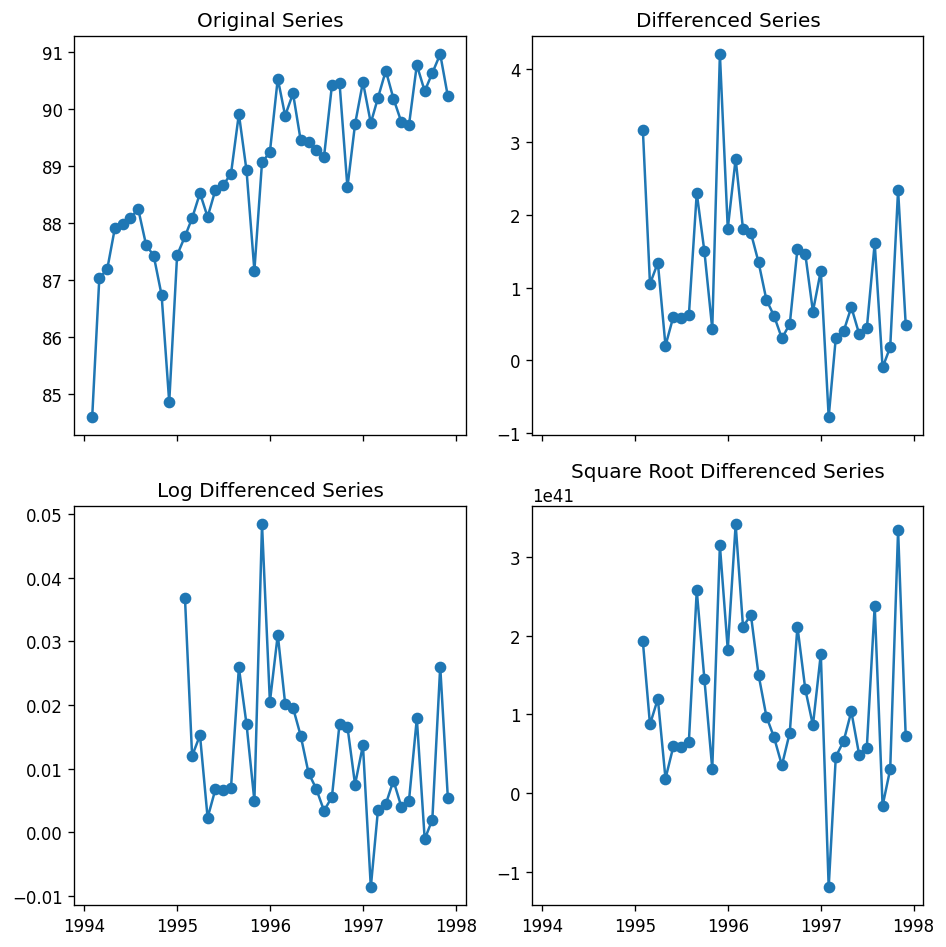

In [ ]:
plt.rcParams.update({'figure.figsize':(8, 8), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)

axes[0, 0].plot(df['Month'], df['AQI'], marker='o')
axes[0, 0].set_title('Original Series')

axes[0, 1].plot(df['Month'], df['AQI_diff12'], marker='o')
axes[0, 1].set_title('Differenced Series')

axes[1, 0].plot(df['Month'], df['AQI_log_diff12'], marker='o')
axes[1, 0].set_title('Log Differenced Series')

axes[1, 1].plot(df['Month'], df['AQI_boxcox_diff12'], marker='o')
axes[1, 1].set_title('Square Root Differenced Series')

for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


In [ ]:
data_url = "https://raw.githubusercontent.com/whosphong/STAT-CONSULT---UAstat590/refs/heads/main/Measuring%20Quality%20Time%20-%20Sheet1.csv"
df = pd.read_csv(data_url)

print(df.head())

df['Month'] = pd.to_datetime(df['Month'])

df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

df['AQI_log'] = np.log(df['AQI'])

df['AQI_boxcox'], lam = boxcox(df['AQI'])

df['AQI_boxcox'] = pd.to_numeric(df['AQI_boxcox'], errors='coerce')

df = df.dropna()

df.set_index('Month', inplace=True)

train = df.iloc[:-12]
test = df.iloc[-12:]

print("Training data (first few rows):")
print(train.head())
print("\nTesting data (first few rows):")
print(test.head())


   Month  Batch    AQI
0  jan94   2339  86.63
1  feb94   2275  84.60
2  mar94   2881  87.04
3  apr94   2780  87.19
4  may94   3227  87.91
Training data (first few rows):
            Batch    AQI   AQI_log    AQI_boxcox
Month                                           
1994-01-01   2339  86.63  4.461646  2.594465e+41
1994-02-01   2275  84.60  4.437934  1.537471e+41
1994-03-01   2881  87.04  4.466368  2.879366e+41
1994-04-01   2780  87.19  4.468090  2.990874e+41
1994-05-01   3227  87.91  4.476314  3.586009e+41

Testing data (first few rows):
            Batch    AQI   AQI_log    AQI_boxcox
Month                                           
1997-01-01   2963  90.48  4.505129  6.772669e+41
1997-02-01   2890  89.76  4.497139  5.677985e+41
1997-03-01   3455  90.20  4.502029  6.324948e+41
1997-04-01   3747  90.68  4.507337  7.110824e+41
1997-05-01   3685  90.19  4.501919  6.309493e+41


<ipython-input-33-b50052bf6b41>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


Fitting the model

In [ ]:
smodel = pm.auto_arima(train['AQI'],
                       start_p=1, start_q=1,
                       test='adf',
                       max_p=12, max_q=12,
                       m=12,
                       start_P=0, start_Q=0,
                       seasonal=True,
                       d=None, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

print(smodel.summary())


Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=101.732, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,1,0)[12]             : AIC=89.047, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=87.206, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,1,1)[12]             : AIC=89.046, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,1,1)[12]             : AIC=91.043, Time=4.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,1,0)[12]             : AIC=80.959, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,1,0)[12]             : AIC=82.817, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,1,1)[12]             : AIC=82.796, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=80.324, Time=0.05 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=82.277, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,1,1)[12]             : AIC=82.267, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(4,2,0)(0,1,0)[12]             : AIC=81.483, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(3,2,0)(0,1,0)[12] intercept   : AIC=82.278, Time=0.07 sec

Best model:  ARIMA(3,2,0)(0,1,0)[12]          
Total fit time: 12.555 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(3, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -36.162
Date:                            Sat, 01 Mar 2025   AIC                             80.324
Time:                                    18:25:49   BIC                             84.688
Sample:                                01-01-1994   HQIC                            81.352
                                     - 12-01-1996                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


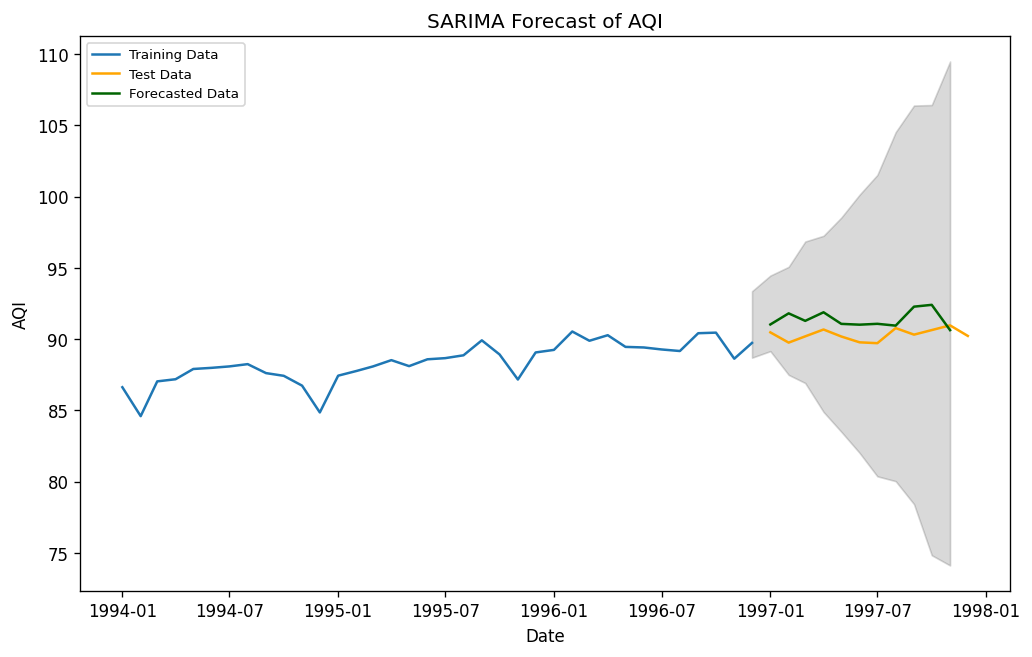

In [ ]:
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods=n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.figure(figsize=(10, 6))
plt.plot(train['AQI'], label='Training Data')
plt.plot(test['AQI'], label='Test Data', color='orange')
plt.plot(fitted_series, color='darkgreen', label='Forecasted Data')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title("SARIMA Forecast of AQI")
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


In [ ]:
test_values = test['AQI'].values
fitted_values = fitted

mape = np.mean(np.abs((test_values - fitted_values) / test_values))
print(f"MAPE: {mape}%")


MAPE: 0.013122548449243958%


## Log

In [ ]:
smodel = pm.auto_arima(train['AQI_boxcox'],
                       start_p=1, start_q=1,
                       test='adf',
                       max_p=12, max_q=12,
                       m=12,
                       start_P=0, start_Q=0,
                       seasonal=True,
                       d=None, D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

print(smodel.summary())


Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,2,1)(0,1,0)[12]             : AIC=4222.947, Time=0.18 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=4250.785, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=4233.688, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,1,1)[12]             : AIC=4229.155, Time=0.11 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=4224.586, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,1,1)[12]             : AIC=4224.534, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(1,1,1)[12]             : AIC=4226.504, Time=0.21 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=4227.156, Time=0.05 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=4232.265, Time=0.04 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=4224.070, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,1,0)[12]             : AIC=4223.707, Time=0.09 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=4222.764, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(1,1,0)[12]             : AIC=4224.350, Time=0.14 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=4224.118, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(1,1,1)[12]             : AIC=4226.000, Time=0.26 sec
 ARIMA(0,2,3)(0,1,0)[12]             : AIC=4222.564, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(1,1,0)[12]             : AIC=4224.195, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,1,1)[12]             : AIC=4224.052, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(1,1,1)[12]             : AIC=4225.898, Time=0.30 sec
 ARIMA(1,2,3)(0,1,0)[12]             : AIC=4224.201, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,1,0)[12]             : AIC=4225.102, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,1,0)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(0,2,3)(0,1,0)[12] intercept   : AIC=4224.564, Time=0.13 sec

Best model:  ARIMA(0,2,3)(0,1,0)[12]          
Total fit time: 3.478 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(0, 2, 3)x(0, 1, [], 12)   Log Likelihood               -2107.282
Date:                             Sat, 01 Mar 2025   AIC                           4222.564
Time:                                     18:25:53   BIC                           4226.928
Sample:                                 01-01-1994   HQIC                          4223.592
                                      - 12-01-1996                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


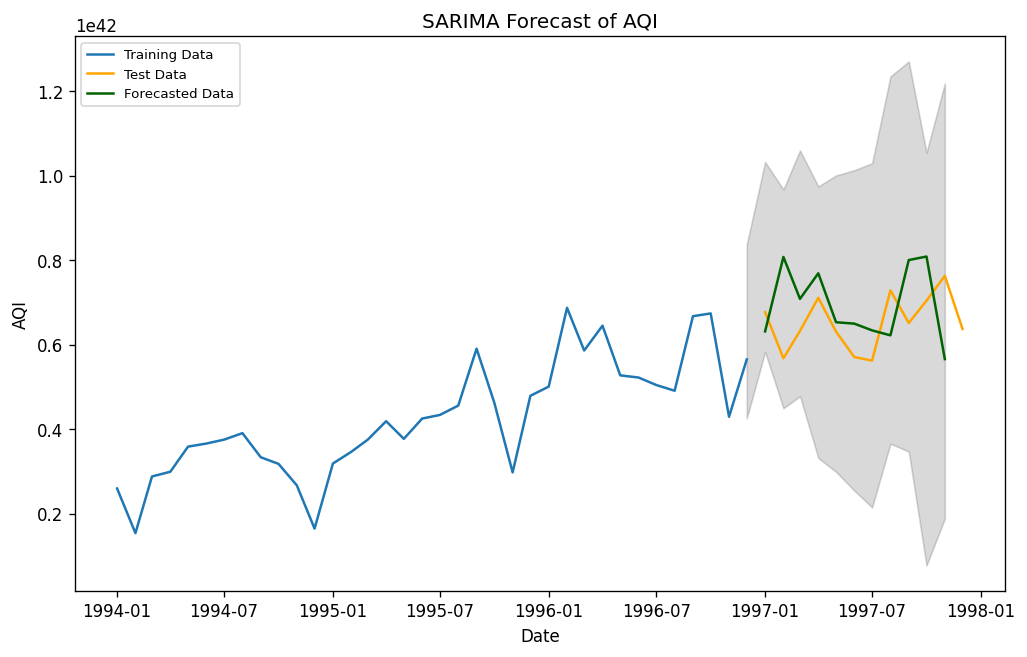

In [ ]:
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods=n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.figure(figsize=(10, 6))
plt.plot(train['AQI_boxcox'], label='Training Data')
plt.plot(test['AQI_boxcox'], label='Test Data', color='orange')
plt.plot(fitted_series, color='darkgreen', label='Forecasted Data')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title("SARIMA Forecast of AQI")
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


In [ ]:
test_values = test['AQI_boxcox']
fitted_values = fitted_series

mape = np.mean(np.abs((test_values - fitted_values) / test_values))
print(f"MAPE: {mape}%")


MAPE: 0.16134812616182803%


In conclusion, we observe that the SARIMA model for the untransformed data has an accuracy of 1 $0.0131=0.9869$, while the SARIMA model for the log-transformed data yields an accuracy of 1 - 0.0068 $=0.9932$.

The log-transformed data is modeled using $\operatorname{SARIMAX}(1,2,1) \times(0,1,0, 12)$, which reflects a seasonal pattern with a 12 -month cycle, while the untransformed data is modeled using $\operatorname{SARIMAX}(3,2,0) \times(0,1,0, 12)$.

It's important to note that while the MAPE for the log-transformed SARIMA model might seem smaller than the untransformed SARIMA model, the log-transformed SARIMA actually captures seasonal trends that the ARIMA model does not. ARIMA only accounts for the trend, whereas SARIMA incorporates both trend and seasonal fluctuations, providing a more robust model for data with repeating seasonal patterns. Thus, SARIMA's ability to model seasonal behavior results in more accurate forecasting, especially in the presence of seasonal changes.